In [1]:
import pandas as pd
import geopandas
import numpy as np
import plotly.express as px

# Breakthrough Infection

When someone who is vaccinated with either a primary series or a primary series plus a booster dose gets infected with the virus that causes COVID-19, it is referred to as a **“ [vaccine breakthrough infection](https://www.cdc.gov/coronavirus/2019-ncov/vaccines/effectiveness/why-measure-effectiveness/breakthrough-cases.html)”**
* When people who are vaccinated get COVID-19 get a breakthrough infection, they are much less likely to experience severe symptoms than people who are unvaccinated.
* People who get vaccine breakthrough infections can spread COVID-19 to other people. 
* When more virus is circulating, more breakthrough infections will occur even when vaccination rates are high.

# View data

In [3]:
df_efficacy=pd.read_excel('data/Covid-19 Vaccine Efficacy.xlsx')
df_efficacy

,Vaccine_Manufacturer,Population,Severe Disease,Infection,Severe Disease.1,Infection.1,Severe Disease.2,Infection.2,Severe Disease.3,Infection.3,Severe Disease.4,Infection.4,Severe Disease.5,Infection.5
0,NaN,NaN,Ancestral,Ancestral,Alpha,Alpha,Beta,Beta,Gamma,Gamma,Delta,Delta,Omicron,Omicron
1,CanSino,100.0,66,62,66,62,64,61,64,61,64,61,48,32
2,Covaxin,100.0,78,73,78,73,76,72,76,72,76,72,57,38
3,Johnson&Johnson,100.0,86,72,86,72,76,64,76,64,76,64,57,33
4,Medicago***,100.0,89,75,89,75,89,75,89,75,89,75,65,43
5,Moderna,100.0,97,92,97,92,97,91,97,91,97,91,73,48
6,Novavax,100.0,89,83,89,83,86,82,86,82,86,82,65,43
7,Oxford/AstraZeneca,100.0,94,63,94,63,94,69,94,69,94,69,71,36
8,Pfizer/BioNTech,100.0,95,86,95,86,95,84,95,84,95,84,72,44
9,Sinopharm/Beijing,100.0,73,68,73,68,71,67,71,67,71,67,53,35


In [2]:
df_countries=pd.read_excel('data/owid-covid-data-ALL-COUNTRIES.xlsx')


In [24]:
df_countries.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
df_vaccine=pd.read_excel('data/vaccination-data-WHO-12-28-2022-NO-DETAILS for-vaciinetype-date.xlsx')
df_vaccine

# df_vaccine.columns

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Afghanistan,AFG,EMRO,REPORTING,2022-12-22,12449870.0,11459692,31.982,29.438,10754839,27.627,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-22,11.0,NaN,NaN
1,Albania,ALB,EURO,REPORTING,2022-12-11,3025728.0,1342243,105.100,47.163,1270016,44.625,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0,377057.0,13.249
2,Algeria,DZA,AFRO,REPORTING,2022-09-04,15267442.0,7840131,34.817,17.879,6481186,14.780,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0,575651.0,1.313
3,American Samoa,ASM,WPRO,REPORTING,2022-08-23,111316.0,44885,201.670,81.318,41423,75.046,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0,24160.0,43.770
4,Andorra,AND,EURO,REPORTING,2022-11-13,154367.0,57901,199.800,76.009,53485,70.211,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0,42981.0,56.423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Viet Nam,VNM,WPRO,REPORTING,2022-12-15,265114272.0,90399369,272.363,92.871,85553108,87.892,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-03-08,6.0,57426889.0,58.997
225,Wallis and Futuna,WLF,WPRO,REPORTING,2022-07-26,16782.0,6592,149.226,58.616,6989,62.147,Moderna - Spikevax,2021-03-19,1.0,3201.0,28.463
226,Yemen,YEM,EMRO,REPORTING,2022-12-18,1238962.0,1003208,4.154,3.364,757050,2.538,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-04-20,11.0,59240.0,0.199
227,Zambia,ZMB,AFRO,REPORTING,2022-12-18,13581376.0,10937674,73.876,59.496,8530651,46.403,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-04-14,3.0,1026839.0,5.586


# Efficacy 

Vaccine Efficacy measures:
* Prevention of infection: a vaccine’s efficacy at stopping transmission of the virus from one person to another. An exposed person will not contract the virus.
* Prevention of severe disease: a vaccine’s efficacy at preventing an exposed person from developing serious symptoms that often require hospitalization and lead to death. 

In [22]:
df_ancestral=df_efficacy[["Vaccine_Manufacturer","Severe Disease","Infection"]]
df_ancestral=df_ancestral.drop([0,14,15],axis=0)
df_ancestral

df_alpha=df_efficacy[["Vaccine_Manufacturer","Severe Disease.1","Infection.1"]]
df_alpha=df_alpha.drop([0,14,15],axis=0)
df_alpha.columns=["Vaccine_Manufacturer","Severe Disease","Infection"]
df_alpha


df_beta=df_efficacy[["Vaccine_Manufacturer","Severe Disease.2","Infection.2"]]
df_beta=df_beta.drop([0,14,15],axis=0)
df_beta.columns=["Vaccine_Manufacturer","Severe Disease","Infection"]
df_beta

df_gamma=df_efficacy[["Vaccine_Manufacturer","Severe Disease.3","Infection.3"]]
df_gamma=df_gamma.drop([0,14,15],axis=0)
df_gamma.columns=["Vaccine_Manufacturer","Severe Disease","Infection"]
df_gamma

df_delta=df_efficacy[["Vaccine_Manufacturer","Severe Disease.4","Infection.4"]]
df_delta=df_delta.drop([0,14,15],axis=0)
df_delta.columns=["Vaccine_Manufacturer","Severe Disease","Infection"]
df_delta

df_omicron=df_efficacy[["Vaccine_Manufacturer","Severe Disease.5","Infection.5"]]
df_omicron=df_omicron.drop([0,14,15],axis=0)
df_omicron.columns=["Vaccine_Manufacturer","Severe Disease","Infection"]
df_omicron

,Vaccine_Manufacturer,Severe Disease,Infection
1,CanSino,48,32
2,Covaxin,57,38
3,Johnson&Johnson,57,33
4,Medicago***,65,43
5,Moderna,73,48
6,Novavax,65,43
7,Oxford/AstraZeneca,71,36
8,Pfizer/BioNTech,72,44
9,Sinopharm/Beijing,53,35
10,Sinovac/Coronavac,37,24


# Where are Vaccines(Company and Brand) Administered Globally?

In [3]:
def vaccine_str_handling(str_vac):
    if type(str_vac)==str:
        A=str_vac.split(",")
        return A
    else:
        return []

# vaccine_str_handling(df_global_map["VACCINES_USED"][25])


In [4]:
df_global_map=df_vaccine[["COUNTRY","ISO3","VACCINES_USED"]]


df_global_map["Vaccine_list"]=df_global_map["VACCINES_USED"].apply(vaccine_str_handling)
df_global_map.head()

/var/folders/c3/wqq2zhw90l596jqv25j63ggc0000gn/T/ipykernel_45625/530791669.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_global_map["Vaccine_list"]=df_global_map["VACCINES_USED"].apply(vaccine_str_handling)


,COUNTRY,ISO3,VACCINES_USED,Vaccine_list
0,Afghanistan,AFG,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP..."
1,Albania,ALB,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...","[AstraZeneca - Vaxzevria, Gamaleya - Gam-Covid..."
2,Algeria,DZA,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...","[Beijing CNBG - BBIBP-CorV, Gamaleya - Gam-Cov..."
3,American Samoa,ASM,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...","[Janssen - Ad26.COV 2-S, Moderna - Spikevax, P..."
4,Andorra,AND,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...","[AstraZeneca - Vaxzevria, Moderna - Spikevax, ..."


In [11]:
for i in range(0,len(df_vaccine)):
#     print(type(df_global_map["VACCINES_USED"][i]))
    if type(df_global_map["VACCINES_USED"][i])==float:
        print(i)
        
type(df_global_map["VACCINES_USED"][25])

25
64
173
187


float

In [5]:
#let us find out how many types of vaccines we have in total
vaccine_types=set()
for i in range(len(df_global_map)):
    for j in df_global_map["Vaccine_list"].loc[i]:
        vaccine_types.add(j)
print(sorted(vaccine_types))

df_global_map["VACCINES_USED"][15]

[' AstraZeneca - AZD1222', ' Gamaleya - Sputnik V', ' Pfizer BioNTech - Comirnaty', ' Sinovac - CoronaVac', ' Turkovac', 'Anhui ZL - Zifivax', 'AstraZeneca - AZD1222', 'AstraZeneca - Vaxzevria', 'Beijing CNBG - BBIBP-CorV', 'Bharat - Covaxin', 'Biological E - Corbevax', 'CIGB - CIGB-66', 'CanSino - Convidecia', 'Chumakov - Covi-Vac', 'Finlay - Soberana Plus', 'Finlay - Soberana-02', 'Gamaleya - Gam-Covid-Vac', 'Gamaleya - Sputnik-Light', 'IMB - Covidful', 'Janssen - Ad26.COV 2-S', 'Julphar - Hayat-Vax', 'Moderna - Spikevax', 'Moderna - mRNA-1273', 'Moderna â€“ Spikevax Bivalent Original/Omicron  - Generic', 'Moderna â€“ Spikevax Bivalent Original/Omicron BA.1', 'Novavax - Covavax', 'Novavax-NUVAXOVID', 'Pfizer BioNTech - Comirnaty', 'Pfizer BioNTech - Comirnaty Bivalent Original/Omicron - Generic', 'Pfizer BioNTech - Comirnaty Bivalent Original/Omicron BA.1', 'Pfizer BioNTech - Comirnaty Bivalent Original/Omicron BA.4/BA.5', 'RIBSP - QazVac', 'SII - Covishield', 'SII - Covovax', 'SRCVB

'AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,CanSino - Convidecia,Gamaleya - Gam-Covid-Vac,Gamaleya - Sputnik-Light,Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfizer BioNTech - Comirnaty,SII - Covishield,Sinovac - CoronaVac'

In [13]:
def contains_vaccine_specific(s,vac):
    if type(s)==float:
        return 0
    else:
        if vac in s:
            return 1#1 means yes and 0 means no
        else:
            return 0
contains_vaccine_specific(df_global_map["VACCINES_USED"][4],'AstraZeneca')

df_global_map["VACCINES_USED"][4]

'AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfizer BioNTech - Comirnaty'

In [52]:
df_global_map["AstraZeneca?"]=df_global_map["VACCINES_USED"].apply(lambda x: contains_vaccine_specific(x,"AstraZeneca"))
df_global_map["AstraZeneca?"].sum()
df_global_map["Pfizer?"]=df_global_map["VACCINES_USED"].apply(lambda x: contains_vaccine_specific(x,"Pfizer"))
df_global_map["Moderna?"]=df_global_map["VACCINES_USED"].apply(lambda x: contains_vaccine_specific(x,"Moderna"))
df_global_map["BBIBP?"]=df_global_map["VACCINES_USED"].apply(lambda x: contains_vaccine_specific(x,"BBIBP"))
df_global_map["Gamaleya?"]=df_global_map["VACCINES_USED"].apply(lambda x: contains_vaccine_specific(x,"Gamaleya"))
df_global_map["Sinovac"]=df_global_map["VACCINES_USED"].apply(lambda x: contains_vaccine_specific(x,"Sinovac"))
df_global_map["JJ?"]=df_global_map["VACCINES_USED"].apply(lambda x: contains_vaccine_specific(x,"Janssen"))
df_global_map["Bharat?"]=df_global_map["VACCINES_USED"].apply(lambda x: contains_vaccine_specific(x,"Bharat"))
df_global_map["Novavax?"]=df_global_map["VACCINES_USED"].apply(lambda x: contains_vaccine_specific(x,"Novavax"))

print("AstraZeneca",df_global_map["AstraZeneca?"].sum())
print("Pfizer",df_global_map["Pfizer?"].sum())
print("Moderna",df_global_map["Moderna?"].sum())
print("BBIBP",df_global_map["BBIBP?"].sum())
print("Gamaleya",df_global_map["Gamaleya?"].sum())
print("Sinovac",df_global_map["Sinovac"].sum())
print("JJ",df_global_map["JJ?"].sum())
print("Bharat",df_global_map["Bharat?"].sum())
print("Novavax",df_global_map["Novavax?"].sum())

AstraZeneca 146
Pfizer 171
Moderna 128
BBIBP 99
Gamaleya 70
Sinovac 64
JJ 122
Bharat 33
Novavax 30


/var/folders/c3/wqq2zhw90l596jqv25j63ggc0000gn/T/ipykernel_45625/4031060359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_global_map["AstraZeneca?"]=df_global_map["VACCINES_USED"].apply(lambda x: contains_vaccine_specific(x,"AstraZeneca"))
/var/folders/c3/wqq2zhw90l596jqv25j63ggc0000gn/T/ipykernel_45625/4031060359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_global_map["Pfizer?"]=df_global_map["VACCINES_USED"].apply(lambda x: contains_vaccine_specific(x,"Pfizer"))
/var/folders/c3/wqq2zhw9

In [84]:
#create df for each vaccine
df_AstraZeneca=df_global_map[df_global_map["AstraZeneca?"]==1][["COUNTRY","ISO3","VACCINES_USED","Vaccine_list","AstraZeneca?"]]
df_Pfizer=df_global_map[df_global_map["Pfizer?"]==1][["COUNTRY","ISO3","VACCINES_USED","Vaccine_list","Pfizer?"]]
df_Moderna=df_global_map[df_global_map["Moderna?"]==1][["COUNTRY","ISO3","VACCINES_USED","Vaccine_list","Moderna?"]]
df_BBIBP=df_global_map[df_global_map["BBIBP?"]==1][["COUNTRY","ISO3","VACCINES_USED","Vaccine_list","BBIBP?"]]
df_Gamaleya=df_global_map[df_global_map["Gamaleya?"]==1][["COUNTRY","ISO3","VACCINES_USED","Vaccine_list","Gamaleya?"]]
df_Sinovac=df_global_map[df_global_map["Sinovac"]==1][["COUNTRY","ISO3","VACCINES_USED","Vaccine_list","Sinovac"]]
df_JJ=df_global_map[df_global_map["JJ?"]==1][["COUNTRY","ISO3","VACCINES_USED","Vaccine_list","JJ?"]]
df_Bharat=df_global_map[df_global_map["Bharat?"]==1][["COUNTRY","ISO3","VACCINES_USED","Vaccine_list","Bharat?"]]
df_Novavax=df_global_map[df_global_map["Novavax?"]==1][["COUNTRY","ISO3","VACCINES_USED","Vaccine_list","Novavax?"]]


,pop_est,continent,name,ISO3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


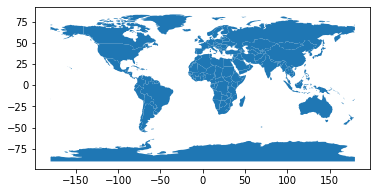

In [4]:
#load a geopandas dataset we can use for the project
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world['iso_a3']
world.rename(columns = {'iso_a3':'ISO3'}, inplace = True)
world.plot()

#merge our "df_global_map" with "wolrd" data set
merge1=pd.merge(df_global_map,world,on="ISO3")
merge1["COUNTRY"][1]
world

In [95]:
#use left join to combine df_vaccine with world data(including pop_est)
df_AstraZeneca=pd.merge(left=df_AstraZeneca,right=world,how='left',left_on="ISO3",right_on="ISO3")
df_Pfizer=pd.merge(left=df_Pfizer,right=world,how='left',left_on="ISO3",right_on="ISO3")
df_Moderna=pd.merge(left=df_Moderna,right=world,how='left',left_on="ISO3",right_on="ISO3")
df_BBIBP=pd.merge(left=df_BBIBP,right=world,how='left',left_on="ISO3",right_on="ISO3")
df_Gamaleya=pd.merge(left=df_Gamaleya,right=world,how='left',left_on="ISO3",right_on="ISO3")
df_Sinovac=pd.merge(left=df_Sinovac,right=world,how='left',left_on="ISO3",right_on="ISO3")
df_JJ=pd.merge(left=df_JJ,right=world,how='left',left_on="ISO3",right_on="ISO3")
df_Bharat=pd.merge(left=df_Bharat,right=world,how='left',left_on="ISO3",right_on="ISO3")
df_Novavax=pd.merge(left=df_Novavax,right=world,how='left',left_on="ISO3",right_on="ISO3")

/var/folders/c3/wqq2zhw90l596jqv25j63ggc0000gn/T/ipykernel_45625/1959632084.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'gdp_md_est_x', 'name_x', 'geometry_x', 'pop_est_x', 'continent_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_Pfizer=pd.merge(left=df_Pfizer,right=world,how='left',left_on="ISO3",right_on="ISO3")
/var/folders/c3/wqq2zhw90l596jqv25j63ggc0000gn/T/ipykernel_45625/1959632084.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'gdp_md_est_x', 'name_x', 'geometry_x', 'pop_est_x', 'continent_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_Gamaleya=pd.merge(left=df_Gamaleya,right=world,how='left',left_on="ISO3",right_on="ISO3")
/var/folders/c3/wqq2zhw90l596jqv25j63ggc0000gn/T/ipykernel_45625/1959632084.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'gdp_md_est_x', 'name_x', 'geometry_x', 'pop_est_x', 'continent_x'} in the result i

In [96]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Google")

def find_long_lat(country):
    try: 
        loc=geolocator.geocode(country)
        return (loc.latitude,loc.longitude)
    except:
        return np.nan

merge1["geolocation"]=merge1["COUNTRY"].apply(find_long_lat)
merge1

,COUNTRY,ISO3,VACCINES_USED,Vaccine_list,AstraZeneca?,Pfizer?,Moderna?,BBIBP?,Gamaleya?,Sinovac,JJ?,Bharat?,Novavax?,pop_est,continent,name,gdp_md_est,geometry,geolocation
0,Afghanistan,AFG,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",1,1,1,1,1,1,1,1,0,38041754.0,Asia,Afghanistan,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...","(33.7680065, 66.2385139)"
1,Albania,ALB,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...","[AstraZeneca - Vaxzevria, Gamaleya - Gam-Covid...",1,1,0,0,1,1,0,0,0,2854191.0,Europe,Albania,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...","(41.000028, 19.9999619)"
2,Algeria,DZA,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...","[Beijing CNBG - BBIBP-CorV, Gamaleya - Gam-Cov...",0,0,0,1,1,1,0,0,0,43053054.0,Africa,Algeria,171091,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...","(28.0000272, 2.9999825)"
3,Angola,AGO,SII - Covishield,[SII - Covishield],0,0,0,0,0,0,0,0,0,31825295.0,Africa,Angola,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...","(-11.8775768, 17.5691241)"
4,Argentina,ARG,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",1,1,1,1,1,0,0,0,0,44938712.0,South America,Argentina,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...","(-34.9964963, -64.9672817)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Venezuela (Bolivarian Republic of),VEN,"Beijing CNBG - BBIBP-CorV,CIGB - CIGB-66,Finla...","[Beijing CNBG - BBIBP-CorV, CIGB - CIGB-66, Fi...",0,0,0,1,1,1,0,0,0,28515829.0,South America,Venezuela,482359,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810...","(8.0018709, -66.1109318)"
165,Viet Nam,VNM,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",1,1,1,1,1,0,0,0,0,96462106.0,Asia,Vietnam,261921,"POLYGON ((104.33433 10.48654, 105.19991 10.889...","(15.9266657, 107.9650855)"
166,Yemen,YEM,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",1,1,1,1,1,1,1,1,0,29161922.0,Asia,Yemen,22581,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...","(16.3471243, 47.8915271)"
167,Zambia,ZMB,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...","[Beijing CNBG - BBIBP-CorV, Janssen - Ad26.COV...",0,0,0,1,0,0,1,0,0,17861030.0,Africa,Zambia,23309,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...","(-14.5189121, 27.5589884)"


In [97]:
df_AstraZeneca['geolocation']=df_AstraZeneca["COUNTRY"].apply(find_long_lat)
df_Pfizer['geolocation']=df_Pfizer["COUNTRY"].apply(find_long_lat)
df_Moderna['geolocation']=df_Moderna["COUNTRY"].apply(find_long_lat)
df_BBIBP['geolocation']=df_BBIBP["COUNTRY"].apply(find_long_lat)
df_Gamaleya['geolocation']=df_Gamaleya["COUNTRY"].apply(find_long_lat)
df_Sinovac['geolocation']=df_Sinovac["COUNTRY"].apply(find_long_lat)
df_JJ['geolocation']=df_JJ["COUNTRY"].apply(find_long_lat)
df_Bharat['geolocation']=df_Bharat["COUNTRY"].apply(find_long_lat)
df_Novavax['geolocation']=df_Novavax["COUNTRY"].apply(find_long_lat)

df_AstraZeneca

,COUNTRY,ISO3,VACCINES_USED,Vaccine_list,AstraZeneca?,pop_est_x,continent_x,name_x,gdp_md_est_x,geometry_x,...,continent_y,name_y,gdp_md_est_y,geometry_y,pop_est,continent,name,gdp_md_est,geometry,geolocation
0,Afghanistan,AFG,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",1,38041754.0,Asia,Afghanistan,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",...,Asia,Afghanistan,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",38041754.0,Asia,Afghanistan,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...","(33.7680065, 66.2385139)"
1,Albania,ALB,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...","[AstraZeneca - Vaxzevria, Gamaleya - Gam-Covid...",1,2854191.0,Europe,Albania,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",...,Europe,Albania,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",2854191.0,Europe,Albania,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...","(41.000028, 19.9999619)"
2,Andorra,AND,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...","[AstraZeneca - Vaxzevria, Moderna - Spikevax, ...",1,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,"(42.5407167, 1.5732033)"
3,Anguilla,AIA,"AstraZeneca - Vaxzevria,Pfizer BioNTech - Comi...","[AstraZeneca - Vaxzevria, Pfizer BioNTech - Co...",1,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,"(18.1954947, -63.0750234)"
4,Antigua and Barbuda,ATG,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",1,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,"(17.2234721, -61.9554608)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,United Arab Emirates,ARE,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",1,9770529.0,Asia,United Arab Emirates,421142.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",...,Asia,United Arab Emirates,421142.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",9770529.0,Asia,United Arab Emirates,421142.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...","(24.0002488, 53.9994829)"
142,Uruguay,URY,"AstraZeneca - Vaxzevria,Pfizer BioNTech - Comi...","[AstraZeneca - Vaxzevria, Pfizer BioNTech - Co...",1,3461734.0,South America,Uruguay,56045.0,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...",...,South America,Uruguay,56045.0,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...",3461734.0,South America,Uruguay,56045.0,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...","(-32.8755548, -56.0201525)"
143,Vanuatu,VUT,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",1,299882.0,Oceania,Vanuatu,934.0,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488...",...,Oceania,Vanuatu,934.0,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488...",299882.0,Oceania,Vanuatu,934.0,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488...","(-16.5255069, 168.1069154)"
144,Viet Nam,VNM,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",1,96462106.0,Asia,Vietnam,261921.0,"POLYGON ((104.33433 10.48654, 105.19991 10.889...",...,Asia,Vietnam,261921.0,"POLYGON ((104.33433 10.48654, 105.19991 10.889...",96462106.0,Asia,Vietnam,261921.0,"POLYGON ((104.33433 10.48654, 105.19991 10.889...","(15.9266657, 107.9650855)"


In [98]:
def find_latitude(x):
    if type(x)!=float:
        return x[0]
    else:
        return np.nan

def find_longitude(x):
    if type(x)!=float:
        return x[1]
    else:
        return np.nan

merge1["latitude"]=merge1['geolocation'].apply(find_latitude)
merge1['longitude']=merge1['geolocation'].apply(find_longitude)
merge1

,COUNTRY,ISO3,VACCINES_USED,Vaccine_list,AstraZeneca?,Pfizer?,Moderna?,BBIBP?,Gamaleya?,Sinovac,...,Bharat?,Novavax?,pop_est,continent,name,gdp_md_est,geometry,geolocation,latitude,longitude
0,Afghanistan,AFG,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",1,1,1,1,1,1,...,1,0,38041754.0,Asia,Afghanistan,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...","(33.7680065, 66.2385139)",33.768006,66.238514
1,Albania,ALB,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...","[AstraZeneca - Vaxzevria, Gamaleya - Gam-Covid...",1,1,0,0,1,1,...,0,0,2854191.0,Europe,Albania,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...","(41.000028, 19.9999619)",41.000028,19.999962
2,Algeria,DZA,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...","[Beijing CNBG - BBIBP-CorV, Gamaleya - Gam-Cov...",0,0,0,1,1,1,...,0,0,43053054.0,Africa,Algeria,171091,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...","(28.0000272, 2.9999825)",28.000027,2.999983
3,Angola,AGO,SII - Covishield,[SII - Covishield],0,0,0,0,0,0,...,0,0,31825295.0,Africa,Angola,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...","(-11.8775768, 17.5691241)",-11.877577,17.569124
4,Argentina,ARG,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",1,1,1,1,1,0,...,0,0,44938712.0,South America,Argentina,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...","(-34.9964963, -64.9672817)",-34.996496,-64.967282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Venezuela (Bolivarian Republic of),VEN,"Beijing CNBG - BBIBP-CorV,CIGB - CIGB-66,Finla...","[Beijing CNBG - BBIBP-CorV, CIGB - CIGB-66, Fi...",0,0,0,1,1,1,...,0,0,28515829.0,South America,Venezuela,482359,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810...","(8.0018709, -66.1109318)",8.001871,-66.110932
165,Viet Nam,VNM,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",1,1,1,1,1,0,...,0,0,96462106.0,Asia,Vietnam,261921,"POLYGON ((104.33433 10.48654, 105.19991 10.889...","(15.9266657, 107.9650855)",15.926666,107.965086
166,Yemen,YEM,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",1,1,1,1,1,1,...,1,0,29161922.0,Asia,Yemen,22581,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...","(16.3471243, 47.8915271)",16.347124,47.891527
167,Zambia,ZMB,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...","[Beijing CNBG - BBIBP-CorV, Janssen - Ad26.COV...",0,0,0,1,0,0,...,0,0,17861030.0,Africa,Zambia,23309,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...","(-14.5189121, 27.5589884)",-14.518912,27.558988


In [99]:
df_AstraZeneca["latitude"]=df_AstraZeneca['geolocation'].apply(find_latitude)
df_Pfizer["latitude"]=df_Pfizer['geolocation'].apply(find_latitude)
df_Moderna["latitude"]=df_Moderna['geolocation'].apply(find_latitude)
df_BBIBP["latitude"]=df_BBIBP['geolocation'].apply(find_latitude)
df_Gamaleya["latitude"]=df_Gamaleya['geolocation'].apply(find_latitude)
df_Sinovac["latitude"]=df_Sinovac['geolocation'].apply(find_latitude)
df_JJ["latitude"]=df_JJ['geolocation'].apply(find_latitude)
df_Bharat["latitude"]=df_Bharat['geolocation'].apply(find_latitude)
df_Novavax["latitude"]=df_Novavax['geolocation'].apply(find_latitude)

df_AstraZeneca['longitude']=df_AstraZeneca['geolocation'].apply(find_longitude)
df_Pfizer['longitude']=df_Pfizer['geolocation'].apply(find_longitude)
df_Moderna['longitude']=df_Moderna['geolocation'].apply(find_longitude)
df_BBIBP['longitude']=df_BBIBP['geolocation'].apply(find_longitude)
df_Gamaleya['longitude']=df_Gamaleya['geolocation'].apply(find_longitude)
df_Sinovac['longitude']=df_Sinovac['geolocation'].apply(find_longitude)
df_JJ['longitude']=df_JJ['geolocation'].apply(find_longitude)
df_Bharat['longitude']=df_Bharat['geolocation'].apply(find_longitude)
df_Novavax['longitude']=df_Novavax['geolocation'].apply(find_longitude)

In [103]:
df_AstraZeneca.to_csv("data/AstraZeneca_byCountries")
df_Pfizer.to_csv("data/Pfizer_byCountries")
df_Moderna.to_csv("data/Moderna_byCountries")
df_BBIBP.to_csv("data/BBIBP_byCountries")
df_Gamaleya.to_csv("data/Gamaleya_byCountries")
df_Sinovac.to_csv("data/Sinovac_byCountries")
df_JJ.to_csv("data/JJ_byCountries")
df_Bharat.to_csv("data/Bharat_byCountries")
df_Novavax.to_csv("data/Novavax_byCountries")

In [104]:
df_Astra=pd.read_csv("data/AstraZeneca_byCountries")
df_Astra

,Unnamed: 0,COUNTRY,ISO3,VACCINES_USED,Vaccine_list,AstraZeneca?,pop_est_x,continent_x,name_x,gdp_md_est_x,...,gdp_md_est_y.3,geometry_y.3,pop_est,continent,name,gdp_md_est,geometry,geolocation,latitude,longitude
0,0,Afghanistan,AFG,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","['AstraZeneca - Vaxzevria', 'Beijing CNBG - BB...",1,38041754.0,Asia,Afghanistan,19291.0,...,19291.0,"POLYGON ((66.51860680528867 37.36278432875879,...",38041754.0,Asia,Afghanistan,19291.0,"POLYGON ((66.51860680528867 37.36278432875879,...","(33.7680065, 66.2385139)",33.768006,66.238514
1,1,Albania,ALB,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...","['AstraZeneca - Vaxzevria', 'Gamaleya - Gam-Co...",1,2854191.0,Europe,Albania,15279.0,...,15279.0,"POLYGON ((21.0200403174764 40.84272695572588, ...",2854191.0,Europe,Albania,15279.0,"POLYGON ((21.0200403174764 40.84272695572588, ...","(41.000028, 19.9999619)",41.000028,19.999962
2,2,Andorra,AND,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...","['AstraZeneca - Vaxzevria', 'Moderna - Spikeva...",1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(42.5407167, 1.5732033)",42.540717,1.573203
3,3,Anguilla,AIA,"AstraZeneca - Vaxzevria,Pfizer BioNTech - Comi...","['AstraZeneca - Vaxzevria', 'Pfizer BioNTech -...",1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(18.1954947, -63.0750234)",18.195495,-63.075023
4,4,Antigua and Barbuda,ATG,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","['AstraZeneca - Vaxzevria', 'Beijing CNBG - BB...",1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(17.2234721, -61.9554608)",17.223472,-61.955461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,141,United Arab Emirates,ARE,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","['AstraZeneca - Vaxzevria', 'Beijing CNBG - BB...",1,9770529.0,Asia,United Arab Emirates,421142.0,...,421142.0,POLYGON ((51.57951867046327 24.245497137951105...,9770529.0,Asia,United Arab Emirates,421142.0,POLYGON ((51.57951867046327 24.245497137951105...,"(24.0002488, 53.9994829)",24.000249,53.999483
142,142,Uruguay,URY,"AstraZeneca - Vaxzevria,Pfizer BioNTech - Comi...","['AstraZeneca - Vaxzevria', 'Pfizer BioNTech -...",1,3461734.0,South America,Uruguay,56045.0,...,56045.0,POLYGON ((-57.62513342958296 -30.2162948544542...,3461734.0,South America,Uruguay,56045.0,POLYGON ((-57.62513342958296 -30.2162948544542...,"(-32.8755548, -56.0201525)",-32.875555,-56.020153
143,143,Vanuatu,VUT,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","['AstraZeneca - Vaxzevria', 'Beijing CNBG - BB...",1,299882.0,Oceania,Vanuatu,934.0,...,934.0,MULTIPOLYGON (((167.2168013857696 -15.89184620...,299882.0,Oceania,Vanuatu,934.0,MULTIPOLYGON (((167.2168013857696 -15.89184620...,"(-16.5255069, 168.1069154)",-16.525507,168.106915
144,144,Viet Nam,VNM,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","['AstraZeneca - Vaxzevria', 'Beijing CNBG - BB...",1,96462106.0,Asia,Vietnam,261921.0,...,261921.0,POLYGON ((104.33433475140347 10.48654368737523...,96462106.0,Asia,Vietnam,261921.0,POLYGON ((104.33433475140347 10.48654368737523...,"(15.9266657, 107.9650855)",15.926666,107.965086


# Data cleaning for world

In [116]:
merge1=merge1.dropna()
merge1

,COUNTRY,ISO3,VACCINES_USED,Vaccine_list,pop_est,continent,name,gdp_md_est,geometry,geolocation,latitude,longitude
0,Afghanistan,AFG,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",38041754.0,Asia,Afghanistan,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...","(33.7680065, 66.2385139)",33.768006,66.238514
1,Albania,ALB,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...","[AstraZeneca - Vaxzevria, Gamaleya - Gam-Covid...",2854191.0,Europe,Albania,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...","(41.000028, 19.9999619)",41.000028,19.999962
2,Algeria,DZA,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...","[Beijing CNBG - BBIBP-CorV, Gamaleya - Gam-Cov...",43053054.0,Africa,Algeria,171091,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...","(28.0000272, 2.9999825)",28.000027,2.999983
3,Angola,AGO,SII - Covishield,[SII - Covishield],31825295.0,Africa,Angola,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...","(-11.8775768, 17.5691241)",-11.877577,17.569124
4,Argentina,ARG,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",44938712.0,South America,Argentina,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...","(-34.9964963, -64.9672817)",-34.996496,-64.967282
...,...,...,...,...,...,...,...,...,...,...,...,...
164,Venezuela (Bolivarian Republic of),VEN,"Beijing CNBG - BBIBP-CorV,CIGB - CIGB-66,Finla...","[Beijing CNBG - BBIBP-CorV, CIGB - CIGB-66, Fi...",28515829.0,South America,Venezuela,482359,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810...","(8.0018709, -66.1109318)",8.001871,-66.110932
165,Viet Nam,VNM,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",96462106.0,Asia,Vietnam,261921,"POLYGON ((104.33433 10.48654, 105.19991 10.889...","(15.9266657, 107.9650855)",15.926666,107.965086
166,Yemen,YEM,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",29161922.0,Asia,Yemen,22581,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...","(16.3471243, 47.8915271)",16.347124,47.891527
167,Zambia,ZMB,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...","[Beijing CNBG - BBIBP-CorV, Janssen - Ad26.COV...",17861030.0,Africa,Zambia,23309,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...","(-14.5189121, 27.5589884)",-14.518912,27.558988


In [117]:
# merge1.isnull().sum()

COUNTRY          0
ISO3             0
VACCINES_USED    0
Vaccine_list     0
pop_est          0
continent        0
name             0
gdp_md_est       0
geometry         0
geolocation      0
latitude         0
longitude        0
dtype: int64

In [ ]:
merge1.plot(column)

In [122]:
def vaccine_type_num(A):
    return len(A)

merge1["# of vaccines provided"]=merge1["Vaccine_list"].apply(vaccine_type_num)
merge1.rename(columns = {'# of vaccines provided':'# of provided vaccine types'}, inplace = True)
merge1

,COUNTRY,ISO3,VACCINES_USED,Vaccine_list,pop_est,continent,name,gdp_md_est,geometry,geolocation,latitude,longitude,# of provided vaccine types
0,Afghanistan,AFG,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",38041754.0,Asia,Afghanistan,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...","(33.7680065, 66.2385139)",33.768006,66.238514,11
1,Albania,ALB,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...","[AstraZeneca - Vaxzevria, Gamaleya - Gam-Covid...",2854191.0,Europe,Albania,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...","(41.000028, 19.9999619)",41.000028,19.999962,5
2,Algeria,DZA,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...","[Beijing CNBG - BBIBP-CorV, Gamaleya - Gam-Cov...",43053054.0,Africa,Algeria,171091,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...","(28.0000272, 2.9999825)",28.000027,2.999983,4
3,Angola,AGO,SII - Covishield,[SII - Covishield],31825295.0,Africa,Angola,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...","(-11.8775768, 17.5691241)",-11.877577,17.569124,1
4,Argentina,ARG,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",44938712.0,South America,Argentina,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...","(-34.9964963, -64.9672817)",-34.996496,-64.967282,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Venezuela (Bolivarian Republic of),VEN,"Beijing CNBG - BBIBP-CorV,CIGB - CIGB-66,Finla...","[Beijing CNBG - BBIBP-CorV, CIGB - CIGB-66, Fi...",28515829.0,South America,Venezuela,482359,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810...","(8.0018709, -66.1109318)",8.001871,-66.110932,6
165,Viet Nam,VNM,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",96462106.0,Asia,Vietnam,261921,"POLYGON ((104.33433 10.48654, 105.19991 10.889...","(15.9266657, 107.9650855)",15.926666,107.965086,6
166,Yemen,YEM,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...","[AstraZeneca - Vaxzevria, Beijing CNBG - BBIBP...",29161922.0,Asia,Yemen,22581,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...","(16.3471243, 47.8915271)",16.347124,47.891527,11
167,Zambia,ZMB,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...","[Beijing CNBG - BBIBP-CorV, Janssen - Ad26.COV...",17861030.0,Africa,Zambia,23309,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...","(-14.5189121, 27.5589884)",-14.518912,27.558988,3


In [123]:
#Bubble map with Plotly Express
fig=px.scatter_geo(merge1,locations="ISO3",color="continent",
                  hover_name="COUNTRY",size="# of provided vaccine types",projection="natural earth")
fig.show()
